<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Deep-Learning-Recommender" data-toc-modified-id="Deep-Learning-Recommender-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deep Learning Recommender</a></span><ul class="toc-item"><li><span><a href="#Creating-dot-product-model" data-toc-modified-id="Creating-dot-product-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creating dot product model</a></span></li><li><span><a href="#Fully-conneted-architeture" data-toc-modified-id="Fully-conneted-architeture-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fully conneted architeture</a></span></li></ul></li></ul></div>

In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
#from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Import Data

In [2]:
data= pd.read_json('Clothing_Shoes_and_Jewelry_5.json', lines = True,encoding='utf-8')

In [3]:
data.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [3]:
data = data[['reviewerID','asin', 'overall']]
data = data.rename(columns={"overall": "rating"})

## Exploratory Data Analysis (EDA)

In [4]:
data.shape

(278677, 3)

In [5]:
data.columns

Index(['reviewerID', 'asin', 'rating'], dtype='object')

In [6]:
data.dtypes

reviewerID    object
asin          object
rating         int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278677 entries, 0 to 278676
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewerID  278677 non-null  object
 1   asin        278677 non-null  object
 2   rating      278677 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.4+ MB


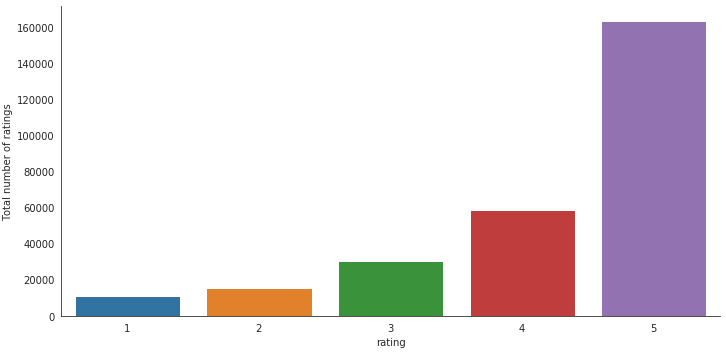

In [8]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [9]:
print("Total no of ratings :",data.shape[0])
print("Total No of Users   :", len(np.unique(data.reviewerID)))
print("Total No of products  :", len(np.unique(data.asin)))

Total no of ratings : 278677
Total No of Users   : 39387
Total No of products  : 23033


In [10]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = data.groupby(by='reviewerID')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head(20)

reviewerID
A2J4XMWKR8PPD0    136
A2GA55P7WGHJCP     76
A2KBV88FL48CFS     69
AENH50GW3OKDA      68
A2V5R832QCSOMX     62
AVUJP7Z6BNT11      61
A132ETQPMHQ585     60
A2UO040HWOP0C2     59
A2GP4EJIAA2OE0     59
A1LM4PSE0HJQDW     55
A3W4D8XOGLWUN5     53
A2PN55MTK1BIL5     53
A2FWDBKX76ILA7     53
A1RRMZKOMZ2M7J     52
A37IRE9GZ0CZ7I     51
A2F4FJ3BIZ68GJ     51
A2R6RA8FRBS608     50
A2IFY6958MRGEM     50
A2USMIT2CSA08      47
A3R72ZJRSS90VX     47
Name: rating, dtype: int64

In [11]:
n =10

In [12]:
print('\n No of rated product more than {} per user : {}\n'.format(n,sum(no_of_rated_products_per_user >= n)) )


 No of rated product more than 10 per user : 5200



In [13]:
df=data.groupby("asin").filter(lambda x:x['rating'].count() >=n)

In [14]:
#Average rating of the product 

df.groupby('asin')['rating'].mean().sort_values(ascending=False).head(10)

asin
B002XRH0KG    5.0
B003HC8RZS    5.0
B002SAURR6    5.0
B002SX533Q    5.0
B000B2XPFO    5.0
B002X34IJ6    5.0
B008EADJPG    5.0
B00318B6R4    5.0
B008DJ4PG0    5.0
B00CBAO6ZC    5.0
Name: rating, dtype: float64

In [15]:
#Total no of rating for product

df.groupby('asin')['rating'].count().sort_values(ascending=False).head()

asin
B005LERHD8    441
B005GYGD7O    286
B008WYDP1C    249
B0058XIMMM    241
B00CKGB85I    225
Name: rating, dtype: int64

In [16]:
ratings_mean_count = pd.DataFrame(df.groupby('asin')['rating'].mean())

In [17]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('asin')['rating'].count())

In [18]:
ratings_mean_count.head()

,rating,rating_counts
asin,,
0000031887,4.608696,23
1608299953,4.307692,13
1617160377,4.625000,16
B00004SR8W,4.666667,12
B00004SR8Z,4.545455,22


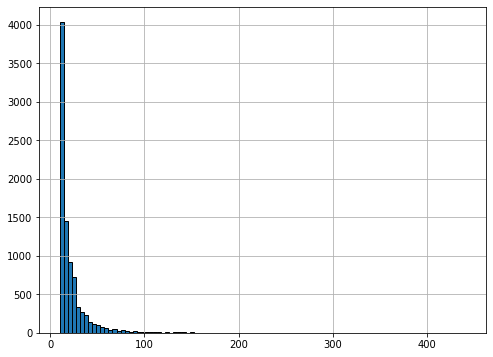

In [19]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=100)

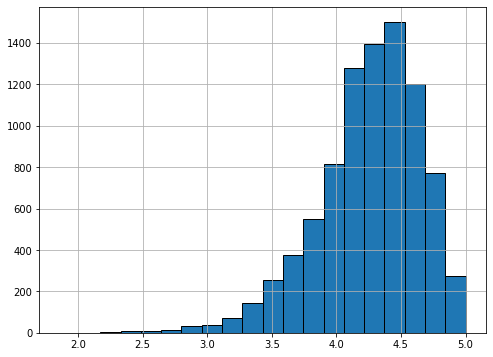

In [20]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=20)

<Figure size 576x432 with 0 Axes>

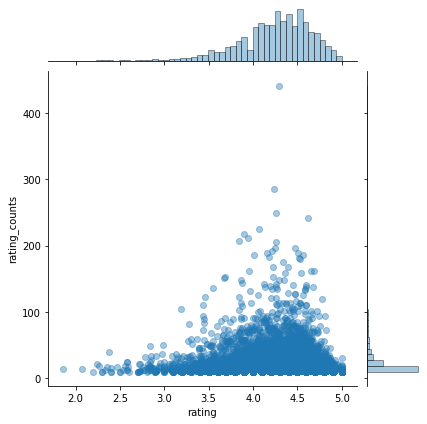

In [21]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

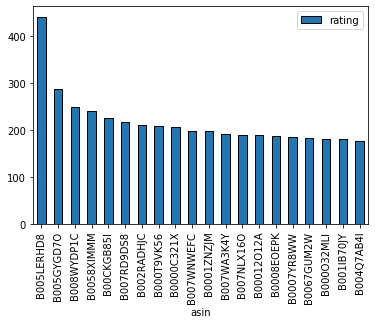

In [22]:
popular_products = pd.DataFrame(df.groupby('asin')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(20).plot(kind = "bar")

## Deep Learning Recommender

In [23]:
from sklearn.preprocessing import LabelEncoder

user_enc = LabelEncoder()
df['user'] = user_enc.fit_transform(df['reviewerID'].values)
n_users = df['user'].nunique()
item_enc = LabelEncoder()
df['item'] = item_enc.fit_transform(df['asin'].values)
n_items = df['item'].nunique()
df['rating'] = df['rating'].values.astype(np.float32)
min_rating = min(df['rating'])
max_rating = max(df['rating'])
n_users, n_items, min_rating, max_rating

(39241, 8743, 1.0, 5.0)

In [24]:
df.head()

,reviewerID,asin,rating,user,item
0,A1KLRMWW2FWPL4,0000031887,5.0,5841,0
1,A2G5TCU2WDFZ65,0000031887,5.0,15063,0
2,A1RLQXYNCMWRWN,0000031887,5.0,7891,0
3,A8U3FAMSJVHS5,0000031887,5.0,31539,0
4,A3GEOILWLK86XM,0000031887,5.0,25613,0


In [25]:
df.describe()

,rating,user,item
count,187665.000000,187665.000000,187665.000000
mean,4.247041,19615.275853,4200.903488
std,1.103624,11307.555767,2560.585405
min,1.000000,0.000000,0.000000
25%,4.000000,9816.000000,1901.000000
50%,5.000000,19571.000000,4205.000000
75%,5.000000,29423.000000,6366.000000
max,5.000000,39240.000000,8742.000000


In [26]:
train, test = train_test_split(df, test_size=0.2, random_state=123)

In [27]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and items
n_users = len(df.user.unique())
n_items = len(df.item.unique())

In [28]:
n_users

39241

In [29]:
n_items

8743

In [30]:
df.head()

,reviewerID,asin,rating,user,item
0,A1KLRMWW2FWPL4,0000031887,5.0,5841,0
1,A2G5TCU2WDFZ65,0000031887,5.0,15063,0
2,A1RLQXYNCMWRWN,0000031887,5.0,7891,0
3,A8U3FAMSJVHS5,0000031887,5.0,31539,0
4,A3GEOILWLK86XM,0000031887,5.0,25613,0


### Creating dot product model

In [31]:
item_input = Input(shape=(1,), name="Item-Input")
item_embedding = Embedding(input_dim = n_items, output_dim=n_latent_factors, input_length=1, name="Item-Embedding")(item_input)
item_vec = Flatten(name="Flatten-Item")(item_embedding)

# creating user embedding path
user_input = Input(shape=(1,), name="User-Input")
user_embedding = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([item_vec, user_vec])
model = Model([user_input, item_input], prod)

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Item-Embedding (Embedding)      (None, 1, 50)        437150      Item-Input[0][0]                 
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 50)        1962050     User-Input[0][0]                 
______________________________________________________________________________________________

In [33]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [34]:
#SVG(plot_model( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

###### Model compilining

In [35]:
optimizer = Adam(lr = 0.0005)
model.compile(loss='mean_squared_error', optimizer = optimizer)

In [36]:
batch_size = 128
epochs = 20

In [37]:
history = model.fit(x=[train.user, train.item], y=train.rating, batch_size= batch_size, epochs=epochs,verbose= 1, validation_data=([test.user, test.item], test.rating))

Train on 150132 samples, validate on 37533 samples
Epoch 1/20
150132/150132 [==============================] - 31s 205us/sample - loss: 19.2466 - val_loss: 19.2868
Epoch 2/20
150132/150132 [==============================] - 29s 191us/sample - loss: 19.0783 - val_loss: 19.2700
Epoch 3/20
150132/150132 [==============================] - 28s 189us/sample - loss: 18.6223 - val_loss: 19.1983
Epoch 4/20
150132/150132 [==============================] - 29s 193us/sample - loss: 17.7044 - val_loss: 19.0371
Epoch 5/20
150132/150132 [==============================] - 31s 204us/sample - loss: 16.3282 - val_loss: 18.7792
Epoch 6/20
150132/150132 [==============================] - 30s 200us/sample - loss: 14.5999 - val_loss: 18.4347
Epoch 7/20
150132/150132 [==============================] - 30s 200us/sample - loss: 12.6484 - val_loss: 18.0160
Epoch 8/20
150132/150132 [==============================] - 28s 187us/sample - loss: 10.5998 - val_loss: 17.5351
Epoch 9/20
150132/150132 [===================

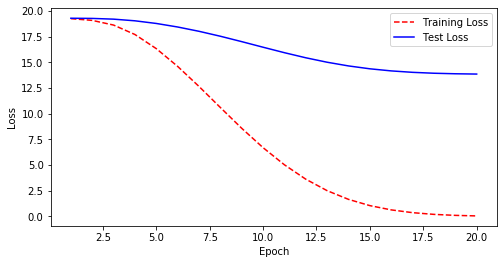

In [38]:
model.save('regression_model.h5')

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [39]:
score = model.evaluate([test.user, test.item], test.rating)
print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

37533/37533 [==============================] - 1s 35us/sample - loss: 13.8552

RMSE: 3.7223


### Fully conneted architeture

In [40]:
# Item Embeddings
item_input = Input(shape=(1,), name="Item-Input")
item_embedding = Embedding(input_dim = n_items, output_dim=n_latent_factors, input_length=1, name="Item-Embedding")(item_input)
item_vec = Flatten(name="Flatten-Item")(item_embedding)

# creating user embedding path
user_input = Input(shape=(1,), name="User-Input")
user_embedding = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# Concatenate Product
merged_vectors = concatenate([user_vec, item_vec], name='Concantenate')
dense_layer_1 = Dense(100, activation='relu')(merged_vectors) 
# dense_layer_1 = Dropout(0.25) (dense_layer_1)
# batchnorm_layer_1 = BatchNormalization()(dense_layer_1)
# dense_layer_2 = Dense(64, activation='relu')(merged_vectors)

result = Dense(1)(dense_layer_1)

model = Model([user_input, item_input], result)

In [41]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Item-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 50)        1962050     User-Input[0][0]                 
__________________________________________________________________________________________________
Item-Embedding (Embedding)      (None, 1, 50)        437150      Item-Input[0][0]                 
____________________________________________________________________________________________

In [42]:
#SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [43]:
optimizer = Adam(lr=0.0002)

In [44]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [45]:
batch_size = 128
epochs = 5

In [46]:
history = model.fit(x=[train.user, train.item], y=train.rating, batch_size= batch_size, epochs=epochs,verbose= 1, validation_data=([test.user, test.item], test.rating))

Train on 150132 samples, validate on 37533 samples
Epoch 1/5
150132/150132 [==============================] - 28s 184us/sample - loss: 6.6672 - val_loss: 1.2812
Epoch 2/5
150132/150132 [==============================] - 27s 183us/sample - loss: 1.0566 - val_loss: 1.1744
Epoch 3/5
150132/150132 [==============================] - 27s 179us/sample - loss: 0.8901 - val_loss: 1.1936
Epoch 4/5
150132/150132 [==============================] - 26s 170us/sample - loss: 0.8299 - val_loss: 1.2100
Epoch 5/5
150132/150132 [==============================] - 26s 172us/sample - loss: 0.7984 - val_loss: 1.2262


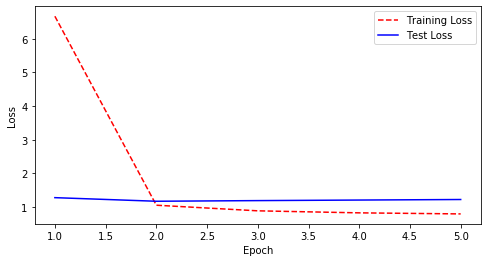

In [47]:
model.save('fullyconnected_model.h5')

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [48]:
score = model.evaluate([test.user, test.item], test.rating)
print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

37533/37533 [==============================] - 1s 36us/sample - loss: 1.2262

RMSE: 1.1073


In [49]:
def recommender(reviewer):
    item_data = np.array(list(set(df.item)))
    userid = df.user[df['reviewerID'] == reviewer].iloc[0]
    user = np.array([userid for i in range(len(item_data))])
    
    predictions = model.predict([user, item_data])
    predictions = np.array([a[0] for a in predictions])
    recommended_items_ids = (-predictions).argsort()[:5]
    recommended_items = df.asin.loc[df['item'].isin(recommended_items_ids)].unique()
    
    return recommended_items

In [50]:
rec = recommender('A3RIOHLQHR44R6')

In [51]:
rec

array(['B000G7VYSE', 'B000WG240Q', 'B001K5KAQI', 'B002NPD2QY',
       'B00DF9NH9O'], dtype=object)